In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np
import seaborn as sns
#from nltk.tokenize import word_tokenize
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression

import nltk
import re
import requests

In [ ]:
train=pd.read_csv("/content/train_LZdllcl.csv")

In [ ]:
# Build a Machine Learning Model to predict wheather an employee is provided or not ,Dependent variable (y) is is_promoted (yes/no)

# Import data as hrdf
# info() head() tail()
# Split_Data into numeric and objects cols wheather numcols age,length_of_service , no_of_training , avg_training_score
# objcols are department ,region , education , gender , recrutimet_channel
# Previous_year_rating ,KPIS_,mets > 80 % ,awards_wons ?

# Descibe() of numcols also skews() and kurt() of numcols
# Histograms , Boxplots , Density Curve - avg_training_score

# Missing Values in eductions and previous_year_rating , impute them accordingly
# Dummy Encode objcols using pd.get_dummies

# Concatenate Both numcols & objcols as hrdf_final
# Split Data into y(is_promoted) & X(all other variable)
# Split Data into train and test
# Build model on train data and test using test data


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
missing_values = train["avg_training_score"].isnull().sum()
print(f"Missing Values in avg_training_score: {missing_values}")

Missing Values in avg_training_score: 0


In [ ]:
train = train.dropna(subset=["avg_training_score"])

In [ ]:
train["avg_training_score"] = pd.to_numeric(train["avg_training_score"], errors="coerce")

In [ ]:
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

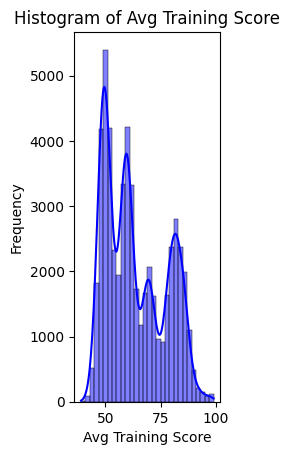

In [ ]:
plt.subplot(1, 3, 1)
sns.histplot(train["avg_training_score"], bins=30, kde=True, color="blue")
plt.title("Histogram of Avg Training Score")
plt.xlabel("Avg Training Score")
plt.ylabel("Frequency")


Text(0.5, 0, 'Avg Training Score')

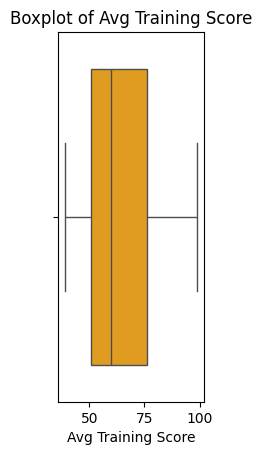

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(x=train["avg_training_score"], color="orange")
plt.title("Boxplot of Avg Training Score")
plt.xlabel("Avg Training Score")

Text(0.5, 0, 'Avg Training Score')

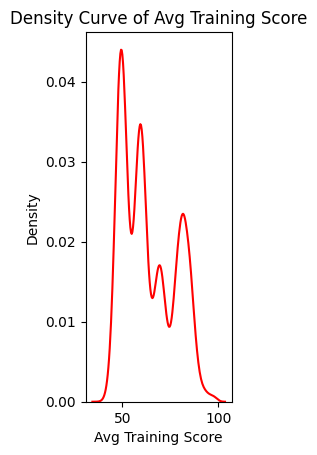

In [ ]:
plt.subplot(1, 3, 3)
sns.kdeplot(train["avg_training_score"], color="red")
plt.title("Density Curve of Avg Training Score")
plt.xlabel("Avg Training Score")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
obj_cols = train.select_dtypes(include=["object"]).columns.tolist()
print(f"Categorical Columns: {obj_cols}")


Categorical Columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [ ]:
train_encoded = pd.get_dummies(train, columns=obj_cols, drop_first=True)
print(train_encoded.head())

   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  \
0              1            0                  49            0   
1              0            0                  60            0   
2              0            0                  50            0   
3              0            0                  50            0   
4              0            0                  73            0   

   department_Finance  ...  region_region_5  region_region_6  region_region_7  \
0               False  ...         

In [ ]:
obj_cols = train.select_dtypes(include=["object"]).columns.tolist()
train = pd.get_dummies(train, columns=obj_cols, drop_first=True)

In [ ]:
y = train["is_promoted"]
X = train.drop(columns=["is_promoted"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (43846, 54)
X_test shape: (10962, 54)
y_train shape: (43846,)
y_test shape: (10962,)


In [ ]:
obj_cols = train.select_dtypes(include=["object"]).columns.tolist()
train = pd.get_dummies(train, columns=obj_cols, drop_first=True)

In [ ]:
y = train["is_promoted"]
X = train.drop(columns=["is_promoted"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9352

Confusion Matrix:
[[10003    25]
 [  685   249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.91      0.27      0.41       934

    accuracy                           0.94     10962
   macro avg       0.92      0.63      0.69     10962
weighted avg       0.93      0.94      0.92     10962



In [ ]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove("is_promoted")

In [ ]:
obj_cols = train.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
# Instead of:
# obj_cols = train.select_dtypes(include=["object"]).columns.tolist()

# Try this:
obj_cols = train.select_dtypes(include=['object']).columns.tolist()
if not obj_cols:  # Check if obj_cols is empty
    print("Warning: No object type columns found for one-hot encoding.")
else:
    train_obj_encoded = pd.get_dummies(train[obj_cols], drop_first=True)

In [ ]:
train_num = train[num_cols]

In [ ]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove("is_promoted")

In [ ]:
obj_cols = train.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
train_num = train[num_cols]  # Select numeric columns
train_obj = train[obj_cols]  # Select categorical columns


In [ ]:
print(f"Numeric Data Shape: {train_num.shape}")
print(f"Categorical Data Shape: {train_obj.shape}")

Numeric Data Shape: (54808, 8)
Categorical Data Shape: (54808, 0)


In [ ]:
print("\nNumeric Columns:")
print(train_num.head())

print("\nCategorical Columns:")
print(train_obj.head())


Numeric Columns:
   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  49  
1              0            0                  60  
2              0            0                  50  
3              0            0                  50  
4              0            0                  73  

Categorical Columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
obj_cols = ["department", "region", "education", "gender", "recruitment_channel",
            "previous_year_rating", "KPIs_met >80%", "awards_won?"]

In [ ]:
num_cols = [col for col in train.columns if col not in obj_cols + ["is_promoted"]]

In [ ]:
obj_cols = ["department", "region", "education", "gender", "recruitment_channel",
            "previous_year_rating", "KPIs_met >80%", "awards_won?"]
num_cols = [col for col in train.columns if col not in obj_cols + ["is_promoted"]]


In [ ]:
train_num = train[num_cols]

In [ ]:
print("Statistical Summary of Numerical Columns:\n")
print(train_num.describe())

Statistical Summary of Numerical Columns:

        employee_id  no_of_trainings           age  length_of_service  \
count  54808.000000     54808.000000  54808.000000       54808.000000   
mean   39195.830627         1.253011     34.803915           5.865512   
std    22586.581449         0.609264      7.660169           4.265094   
min        1.000000         1.000000     20.000000           1.000000   
25%    19669.750000         1.000000     29.000000           3.000000   
50%    39225.500000         1.000000     33.000000           5.000000   
75%    58730.500000         1.000000     39.000000           7.000000   
max    78298.000000        10.000000     60.000000          37.000000   

       avg_training_score  
count        54808.000000  
mean            63.386750  
std             13.371559  
min             39.000000  
25%             51.000000  
50%             60.000000  
75%             76.000000  
max             99.000000  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
skewness = train_num.apply(skew)
kurtosis_values = train_num.apply(kurtosis)

Text(0, 0.5, 'Frequency')

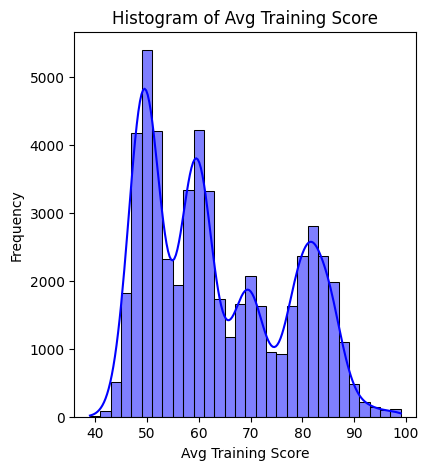

In [ ]:
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(train["avg_training_score"], bins=30, kde=True, color="blue")
plt.title("Histogram of Avg Training Score")
plt.xlabel("Avg Training Score")
plt.ylabel("Frequency")

Text(0.5, 0, 'Avg Training Score')

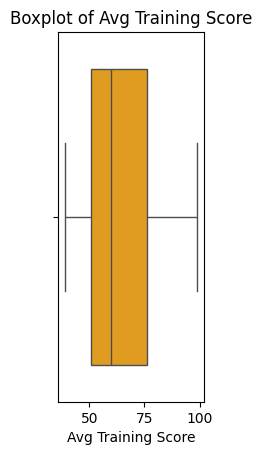

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(x=train["avg_training_score"], color="orange")
plt.title("Boxplot of Avg Training Score")
plt.xlabel("Avg Training Score")

Text(0.5, 0, 'Avg Training Score')

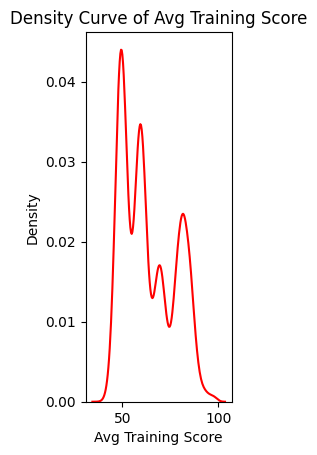

In [ ]:
plt.subplot(1, 3, 3)
sns.kdeplot(train["avg_training_score"], color="red")
plt.title("Density Curve of Avg Training Score")
plt.xlabel("Avg Training Score")


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
obj_cols = ["department", "region", "education", "gender", "recruitment_channel",
            "previous_year_rating", "KPIs_met >80%", "awards_won?"]

In [ ]:
train["education"].fillna(train["education"].mode()[0], inplace=True)
# Impute with mode
train["previous_year_rating"].fillna(train["previous_year_rating"].median(), inplace=True)  # Impute with median


KeyError: 'education'

In [ ]:
train_encoded = pd.get_dummies(train, columns=obj_cols, drop_first=True)


In [ ]:
print(f"Shape of encoded dataset: {train_encoded.shape}")

In [ ]:
print(train_encoded.head())


In [ ]:
 numcols=train.select_dtypes(include=np.number) # np.number selects int & float
objcols=train.select_dtypes(include=['object'])

In [ ]:
numcols.head(2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
Rfmodel=RandomForestClassifier(n_estimators=200).fit(x_smote,y_smote)

In [ ]:
RFmodel.score(x_smote,y_smote)

In [ ]:
pd.crosstab(y_smote,RF_predict)

In [ ]:
print(classification_report(y_smote,RF_predict))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier(n_estimators=1000,max_depth=5).fit(x_smote,y_smote) # 1000 Trees

In [ ]:
gbm.score(x_smote,y_smote)

In [ ]:
gbm_predict=gbm.predict(x_smote)

In [ ]:
pd.croasstab(y_smote,gbm_predict)

In [ ]:
print(classification_report(y_smote,gbm_predict))

In [ ]:
# 3 Types of Naive Bayes
# 1) Gaussian NB - > when majority of independent varaiables are  numercial
# 2) BernouliNB -> When majority of independent varaibles are binary / Boolean
# 3) MultinomialNB -> When Independent varaiables is multinimial (more than 2 levels / classes)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nb=BernoulliNB().fit(x_smote,y_smote)

In [ ]:
nb_predict=nb.predict(x_smote)

In [ ]:
pd.crosstab(y_smote,nb_predict)

In [ ]:
print(Classification Report(y_smote,nb_predict))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-63-3408b03015dd>, line 1)